In [2]:
# Here is NY Watersheds which shows water quality values sampled from many locations. 
# This analysis is to show the healtiness level of surface water bodies in NY 
# Data includes 4-hour-Turbidity values (six times a day), Daily Average Turbidity
# and Fecal Coliform level of the sample as well as with the date and location info.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# I, first start by importing necessary py libs and opening the data 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

import os
wqdata = pd.read_csv('watershed-water-quality-data.csv')
wqdata.columns

Index(['Site', 'Date', 'Turbidity(NTU) at 12AM', 'Turbidity(NTU) at 4AM',
       'Turbidity(NTU) at 8AM', 'Turbidity(NTU) at 12PM',
       'Turbidity(NTU) at 4PM', 'Turbidity(NTU) at 8PM',
       'Average 24hrTurbidity(NTU)', 'Coliform, Fecal(fc/100mL)'],
      dtype='object')

In [3]:
# Here we look at the descriptive statistics on the data exploring the 
# data range, averages and sample counts of only numeric data (so it excludes date and location)
wqdata.describe()

,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU)
count,1872.000000,1880.000000,1883.000000,1875.000000,1876.000000,1876.000000,1884.000000
mean,0.773478,0.770984,0.773765,0.768640,0.772974,0.776413,0.773625
std,0.139185,0.139603,0.137823,0.145166,0.160939,0.143553,0.128155
min,0.450000,0.450000,0.450000,0.400000,0.450000,0.450000,0.470000
25%,0.650000,0.650000,0.650000,0.650000,0.650000,0.650000,0.680000
50%,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.770000
75%,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000
max,1.500000,1.500000,1.600000,1.800000,4.300000,1.500000,1.430000


In [4]:
# To examine data, we could use .head() or .tail() for instance
wqdata.head()

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.6,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.7,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.7,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.7,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.6,0.75,0.65,0.65,0.70,0.68,E2


In [5]:
# .info shows data types and names of the columns with data range
# it is also possible to see the missing data in each data attribute (columns)
wqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 10 columns):
Site                          1884 non-null object
Date                          1884 non-null object
Turbidity(NTU) at 12AM        1872 non-null float64
Turbidity(NTU) at 4AM         1880 non-null float64
Turbidity(NTU) at 8AM         1883 non-null float64
Turbidity(NTU) at 12PM        1875 non-null float64
Turbidity(NTU) at 4PM         1876 non-null float64
Turbidity(NTU) at 8PM         1876 non-null float64
Average 24hrTurbidity(NTU)    1884 non-null float64
Coliform, Fecal(fc/100mL)     1878 non-null object
dtypes: float64(7), object(3)
memory usage: 147.3+ KB


In [6]:
# Here, we produce a correlation matrix of each attribute to see 
# if there is a direct relationship among turbidity and fecal coliform (FC) levels

wqdata.corr()

# We can say that 4-hour-turbidity samples shows high correlation with previous and next samples
# All 4-hour-turbidity samples also highly correlated with daily turbidity

,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU)
Turbidity(NTU) at 12AM,1.000000,0.888009,0.843208,0.744311,0.644597,0.738107,0.906522
Turbidity(NTU) at 4AM,0.888009,1.000000,0.869541,0.762270,0.648406,0.764064,0.919999
Turbidity(NTU) at 8AM,0.843208,0.869541,1.000000,0.759008,0.634162,0.746112,0.904584
Turbidity(NTU) at 12PM,0.744311,0.762270,0.759008,1.000000,0.695353,0.795031,0.890878
Turbidity(NTU) at 4PM,0.644597,0.648406,0.634162,0.695353,1.000000,0.716881,0.822601
Turbidity(NTU) at 8PM,0.738107,0.764064,0.746112,0.795031,0.716881,1.000000,0.892275
Average 24hrTurbidity(NTU),0.906522,0.919999,0.904584,0.890878,0.822601,0.892275,1.000000


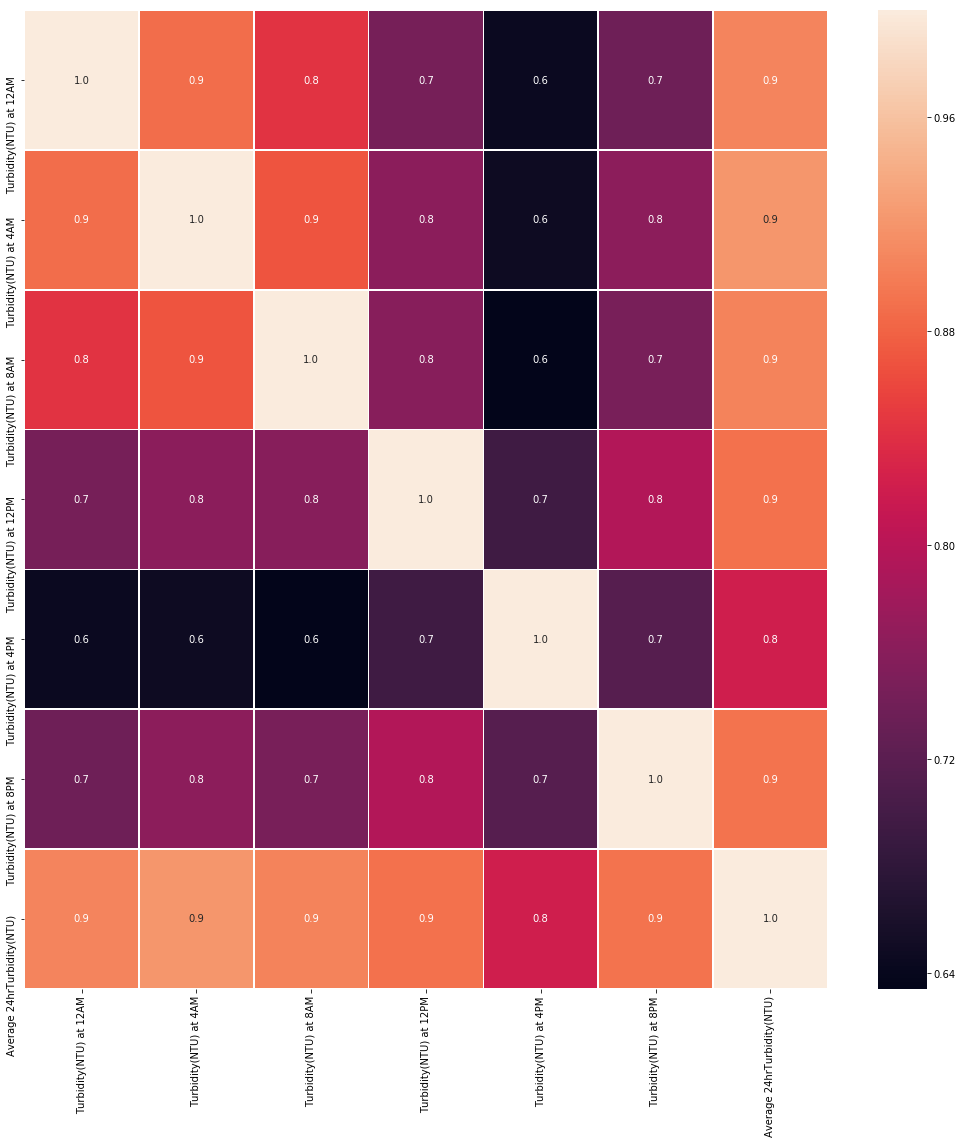

In [7]:
# By using seaborn library's correlation map function we build a color - coded correlation matrix 

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(wqdata.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Here we have 4-hour-turbidity (interval) samples and daily turbidity average
# It is possible to say the 4PM has the least effect on daily turbidity average 
# and other interval samplings since it has the lowest correlation with the others

In [8]:
wqdata.columns

Index(['Site', 'Date', 'Turbidity(NTU) at 12AM', 'Turbidity(NTU) at 4AM',
       'Turbidity(NTU) at 8AM', 'Turbidity(NTU) at 12PM',
       'Turbidity(NTU) at 4PM', 'Turbidity(NTU) at 8PM',
       'Average 24hrTurbidity(NTU)', 'Coliform, Fecal(fc/100mL)'],
      dtype='object')

Text(0.5, 1.0, '8 PM vs Daily Turbidity Scatter Plot')

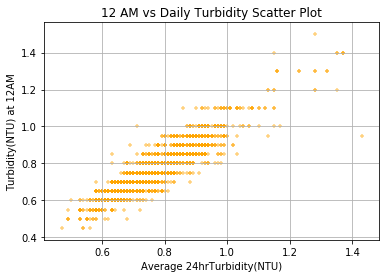

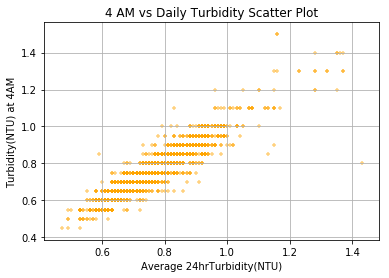

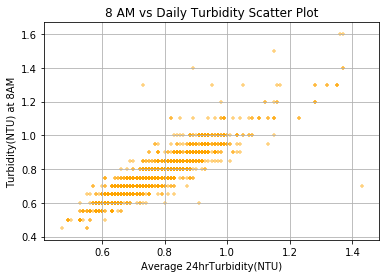

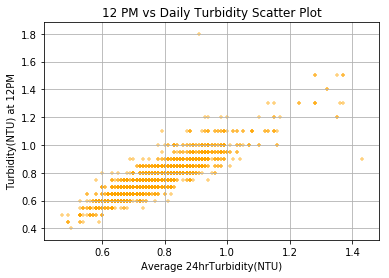

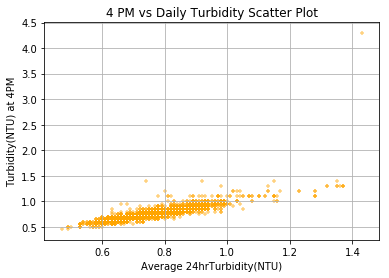

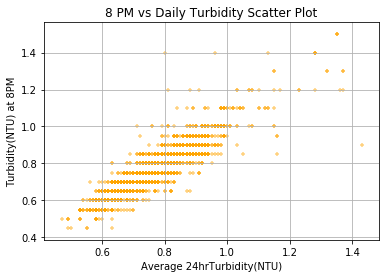

In [9]:
# To see that better we will look at the scatter plots of interval 
# samples against daily average of turbidity

# Scatter Plots will be set as x = Daily Turbidity Average and y = interval sampling 

wqdata.plot(kind='scatter', marker='+', grid=True, x='Average 24hrTurbidity(NTU)', y='Turbidity(NTU) at 12AM',alpha = 0.5,color = 'orange')
plt.xlabel('Average 24hrTurbidity(NTU)') 
plt.ylabel('Turbidity(NTU) at 12AM')
plt.title('12 AM vs Daily Turbidity Scatter Plot')

wqdata.plot(kind='scatter', marker='+', grid=True, x='Average 24hrTurbidity(NTU)', y='Turbidity(NTU) at 4AM',alpha = 0.5,color = 'orange')
plt.xlabel('Average 24hrTurbidity(NTU)') 
plt.ylabel('Turbidity(NTU) at 4AM')
plt.title('4 AM vs Daily Turbidity Scatter Plot')

wqdata.plot(kind='scatter', marker='+', grid=True, x='Average 24hrTurbidity(NTU)', y='Turbidity(NTU) at 8AM',alpha = 0.5,color = 'orange')
plt.xlabel('Average 24hrTurbidity(NTU)') 
plt.ylabel('Turbidity(NTU) at 8AM')
plt.title('8 AM vs Daily Turbidity Scatter Plot')

wqdata.plot(kind='scatter', marker='+', grid=True, x='Average 24hrTurbidity(NTU)', y='Turbidity(NTU) at 12PM',alpha = 0.5,color = 'orange')
plt.xlabel('Average 24hrTurbidity(NTU)') 
plt.ylabel('Turbidity(NTU) at 12PM')
plt.title('12 PM vs Daily Turbidity Scatter Plot')

wqdata.plot(kind='scatter', marker='+', grid=True, x='Average 24hrTurbidity(NTU)', y='Turbidity(NTU) at 4PM',alpha = 0.5,color = 'orange')
plt.xlabel('Average 24hrTurbidity(NTU)') 
plt.ylabel('Turbidity(NTU) at 4PM')
plt.title('4 PM vs Daily Turbidity Scatter Plot')

wqdata.plot(kind='scatter', marker='+', grid=True, x='Average 24hrTurbidity(NTU)', y='Turbidity(NTU) at 8PM',alpha = 0.5,color = 'orange')
plt.xlabel('Average 24hrTurbidity(NTU)') 
plt.ylabel('Turbidity(NTU) at 8PM')
plt.title('8 PM vs Daily Turbidity Scatter Plot')

<function matplotlib.pyplot.show(*args, **kw)>

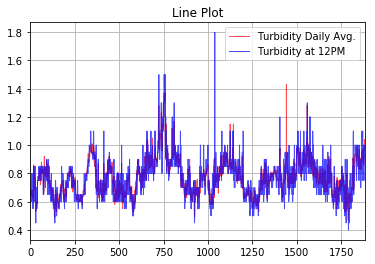

In [10]:
# This section covers some plots by using Matplotlib library
# such as line, scatter and histogram plots

# Line Plot 
wqdata['Average 24hrTurbidity(NTU)'].plot(kind='line', y='Average 24hrTurbidity(NTU)', x='Date', color='r', label='Turbidity Daily Avg.', linewidth=1, alpha=0.7, grid=True, linestyle='-')
wqdata['Turbidity(NTU) at 12PM'].plot(color='b', y='Turbidity(NTU) at 12PM', x='Date', label='Turbidity at 12PM', linewidth=1, alpha=0.7, grid=True, linestyle='-')

plt.legend(loc='upper right')     # legend = puts label into plot
#plt.xlabel('Date')              # label = name of label
#plt.ylabel('Turbidity (NTU)')
plt.title('Line Plot')            # title = title of plot
plt.show

In [11]:
wqdata.columns

Index(['Site', 'Date', 'Turbidity(NTU) at 12AM', 'Turbidity(NTU) at 4AM',
       'Turbidity(NTU) at 8AM', 'Turbidity(NTU) at 12PM',
       'Turbidity(NTU) at 4PM', 'Turbidity(NTU) at 8PM',
       'Average 24hrTurbidity(NTU)', 'Coliform, Fecal(fc/100mL)'],
      dtype='object')

In [12]:
wqdata.head()

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.6,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.7,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.7,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.7,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.6,0.75,0.65,0.65,0.70,0.68,E2


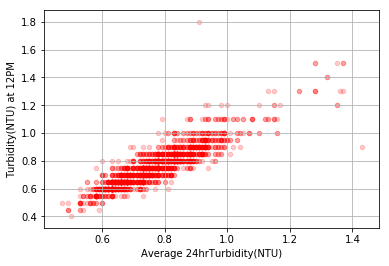

In [13]:
wqdata.plot(kind='scatter', x='Average 24hrTurbidity(NTU)', y='Turbidity(NTU) at 12PM', color='red', alpha=0.2, grid=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

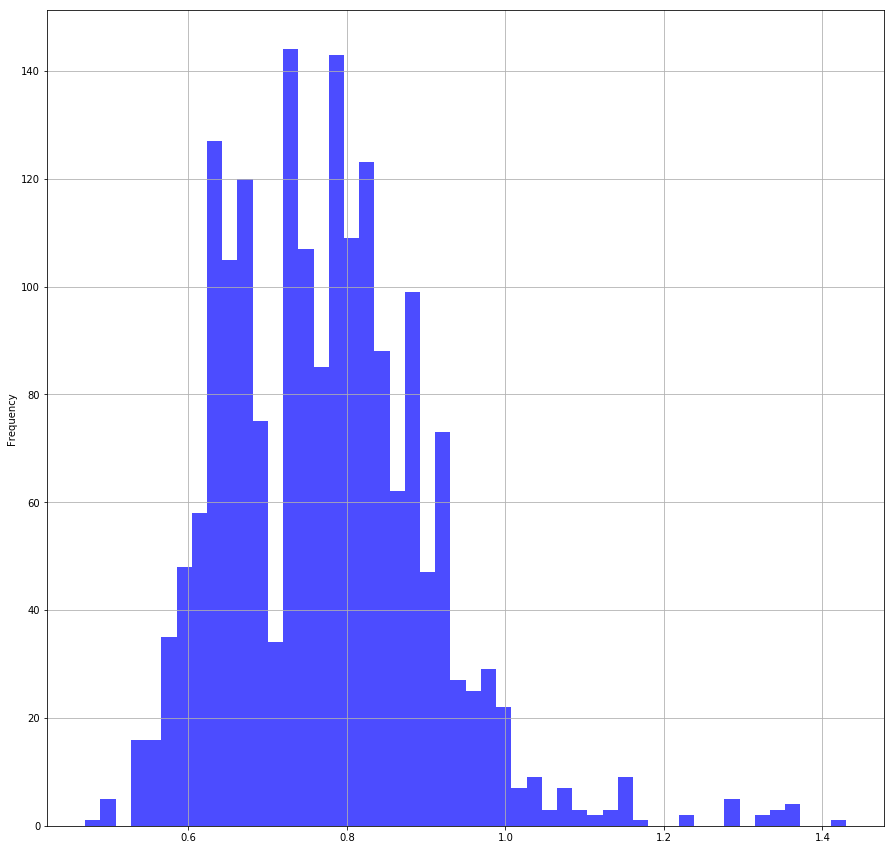

In [15]:
wqdata['Average 24hrTurbidity(NTU)'].plot(kind='hist', color='blue', label='Turbidity Daily Avg.', bins=50, figsize=(15,15), alpha=0.7, grid=True)

plt.show

In [16]:
# We will create and play with pandas library using our data 
wqdata

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.60,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.70,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.70,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.70,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.60,0.75,0.65,0.65,0.70,0.68,E2
5,DEL18DT,2019-10-26T00:00:00.000,0.65,0.65,0.60,0.75,0.75,0.65,0.68,E1
6,DEL18DT,2019-10-25T00:00:00.000,0.60,0.80,0.70,0.60,0.65,0.65,0.67,<1
7,DEL18DT,2019-10-24T00:00:00.000,0.65,0.65,0.65,0.65,0.65,0.65,0.65,E1
8,DEL18DT,2019-10-23T00:00:00.000,0.60,0.60,0.65,0.80,0.60,0.65,0.65,E5
9,DEL18DT,2019-10-22T00:00:00.000,0.55,0.70,0.75,0.60,0.60,0.65,0.64,E6


In [17]:
wqdata[:6]

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.60,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.70,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.70,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.70,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.60,0.75,0.65,0.65,0.70,0.68,E2
5,DEL18DT,2019-10-26T00:00:00.000,0.65,0.65,0.60,0.75,0.75,0.65,0.68,E1


In [18]:
wqdata[2:6]

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.70,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.70,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.60,0.75,0.65,0.65,0.70,0.68,E2
5,DEL18DT,2019-10-26T00:00:00.000,0.65,0.65,0.60,0.75,0.75,0.65,0.68,E1


In [21]:
import pandas as pd 
wqdata = pd.read_csv('watershed-water-quality-data.csv')

# We'll define two columns as separate data series 
# which are dates and corresponding turbidity avegare values
dates=wqdata['Date']
turbidity=wqdata['Average 24hrTurbidity(NTU)']

print(dates)
print(turbidity)

0       2019-10-31T00:00:00.000
1       2019-10-30T00:00:00.000
2       2019-10-29T00:00:00.000
3       2019-10-28T00:00:00.000
4       2019-10-27T00:00:00.000
5       2019-10-26T00:00:00.000
6       2019-10-25T00:00:00.000
7       2019-10-24T00:00:00.000
8       2019-10-23T00:00:00.000
9       2019-10-22T00:00:00.000
10      2019-10-21T00:00:00.000
11      2019-10-20T00:00:00.000
12      2019-10-19T00:00:00.000
13      2019-10-18T00:00:00.000
14      2019-10-17T00:00:00.000
15      2019-10-16T00:00:00.000
16      2019-10-15T00:00:00.000
17      2019-10-14T00:00:00.000
18      2019-10-13T00:00:00.000
19      2019-10-12T00:00:00.000
20      2019-10-11T00:00:00.000
21      2019-10-10T00:00:00.000
22      2019-10-09T00:00:00.000
23      2019-10-08T00:00:00.000
24      2019-10-07T00:00:00.000
25      2019-10-06T00:00:00.000
26      2019-10-05T00:00:00.000
27      2019-10-04T00:00:00.000
28      2019-10-03T00:00:00.000
29      2019-10-02T00:00:00.000
                 ...           
1854    

In [22]:
print(dates>'2018-12-12T00:00:00')

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1854    False
1855    False
1856    False
1857    False
1858    False
1859    False
1860    False
1861    False
1862    False
1863    False
1864    False
1865    False
1866    False
1867    False
1868    False
1869    False
1870    False
1871    False
1872    False
1873    False
1874    False
1875    False
1876    False
1877    False
1878    False
1879    False
1880    False
1881    False
1882    False
1883    False
Name: Date, Length: 1884, dtype: bool


In [23]:
print(turbidity<0.85)

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20      False
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1854    False
1855     True
1856     True
1857     True
1858     True
1859     True
1860    False
1861     True
1862    False
1863    False
1864    False
1865    False
1866    False
1867    False
1868    False
1869    False
1870    False
1871    False
1872    False
1873    False
1874    False
1875    False
1876    False
1877    False
1878    False
1879    False
1880    False
1881    False
1882    False
1883    False
Name: Average 24hrTurbidity(NTU), Length: 1884, dtype: bool


In [24]:
# Now we define a filter to see the data exactly we wanted to see
date_filter = wqdata['Date']>'2018-12-27T00:00:00' # Last four days of the dataset
wqdata[date_filter]

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.60,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.70,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.70,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.70,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.60,0.75,0.65,0.65,0.70,0.68,E2
5,DEL18DT,2019-10-26T00:00:00.000,0.65,0.65,0.60,0.75,0.75,0.65,0.68,E1
6,DEL18DT,2019-10-25T00:00:00.000,0.60,0.80,0.70,0.60,0.65,0.65,0.67,<1
7,DEL18DT,2019-10-24T00:00:00.000,0.65,0.65,0.65,0.65,0.65,0.65,0.65,E1
8,DEL18DT,2019-10-23T00:00:00.000,0.60,0.60,0.65,0.80,0.60,0.65,0.65,E5
9,DEL18DT,2019-10-22T00:00:00.000,0.55,0.70,0.75,0.60,0.60,0.65,0.64,E6


In [25]:
val_filter = wqdata['Average 24hrTurbidity(NTU)']>0.55
wqdata[val_filter]
# Now we got the turbidity values which are greater than 0.95
# 1440 rows to be exact, as noted in the bottom

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.60,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.70,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.70,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.70,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.60,0.75,0.65,0.65,0.70,0.68,E2
5,DEL18DT,2019-10-26T00:00:00.000,0.65,0.65,0.60,0.75,0.75,0.65,0.68,E1
6,DEL18DT,2019-10-25T00:00:00.000,0.60,0.80,0.70,0.60,0.65,0.65,0.67,<1
7,DEL18DT,2019-10-24T00:00:00.000,0.65,0.65,0.65,0.65,0.65,0.65,0.65,E1
8,DEL18DT,2019-10-23T00:00:00.000,0.60,0.60,0.65,0.80,0.60,0.65,0.65,E5
9,DEL18DT,2019-10-22T00:00:00.000,0.55,0.70,0.75,0.60,0.60,0.65,0.64,E6


In [27]:
# Now we use numpy logical_and operator to combine both filter 
wqdata[np.logical_and(wqdata['Date']>'2018-12-27T00:00:00', wqdata['Average 24hrTurbidity(NTU)']>0.55)]
# We combined the filters and got data collected after specified date 
# and having values higher than 0.55

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.60,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.70,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.70,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.70,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.60,0.75,0.65,0.65,0.70,0.68,E2
5,DEL18DT,2019-10-26T00:00:00.000,0.65,0.65,0.60,0.75,0.75,0.65,0.68,E1
6,DEL18DT,2019-10-25T00:00:00.000,0.60,0.80,0.70,0.60,0.65,0.65,0.67,<1
7,DEL18DT,2019-10-24T00:00:00.000,0.65,0.65,0.65,0.65,0.65,0.65,0.65,E1
8,DEL18DT,2019-10-23T00:00:00.000,0.60,0.60,0.65,0.80,0.60,0.65,0.65,E5
9,DEL18DT,2019-10-22T00:00:00.000,0.55,0.70,0.75,0.60,0.60,0.65,0.64,E6


In [28]:
#gives same output 
wqdata[(wqdata['Date']>'2018-12-27T00:00:00')&(wqdata['Average 24hrTurbidity(NTU)']>0.55)]

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.60,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.70,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.70,0.65,0.65,0.60,0.70,0.66,E5
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.70,0.70,0.65,0.65,0.60,0.66,E6
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.60,0.75,0.65,0.65,0.70,0.68,E2
5,DEL18DT,2019-10-26T00:00:00.000,0.65,0.65,0.60,0.75,0.75,0.65,0.68,E1
6,DEL18DT,2019-10-25T00:00:00.000,0.60,0.80,0.70,0.60,0.65,0.65,0.67,<1
7,DEL18DT,2019-10-24T00:00:00.000,0.65,0.65,0.65,0.65,0.65,0.65,0.65,E1
8,DEL18DT,2019-10-23T00:00:00.000,0.60,0.60,0.65,0.80,0.60,0.65,0.65,E5
9,DEL18DT,2019-10-22T00:00:00.000,0.55,0.70,0.75,0.60,0.60,0.65,0.64,E6


In [29]:
wqdata.loc[3:10, 'Date']

3     2019-10-28T00:00:00.000
4     2019-10-27T00:00:00.000
5     2019-10-26T00:00:00.000
6     2019-10-25T00:00:00.000
7     2019-10-24T00:00:00.000
8     2019-10-23T00:00:00.000
9     2019-10-22T00:00:00.000
10    2019-10-21T00:00:00.000
Name: Date, dtype: object

In [32]:
# Data Cleaning
wqdata.head(3)

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.6,0.65,0.65,0.65,0.65,0.64,E4
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.7,0.75,0.60,0.65,0.60,0.66,E4
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.7,0.65,0.65,0.60,0.70,0.66,E5


In [33]:
wqdata.shape

(1884, 10)

In [34]:
wqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 10 columns):
Site                          1884 non-null object
Date                          1884 non-null object
Turbidity(NTU) at 12AM        1872 non-null float64
Turbidity(NTU) at 4AM         1880 non-null float64
Turbidity(NTU) at 8AM         1883 non-null float64
Turbidity(NTU) at 12PM        1875 non-null float64
Turbidity(NTU) at 4PM         1876 non-null float64
Turbidity(NTU) at 8PM         1876 non-null float64
Average 24hrTurbidity(NTU)    1884 non-null float64
Coliform, Fecal(fc/100mL)     1878 non-null object
dtypes: float64(7), object(3)
memory usage: 147.3+ KB


In [35]:
# We'd like to know the frequency of different values for a data column (attribute).
# This is why we'd use .value_counts() method 
# This method is good to produce data frequency and visualize it by using histogram plot
print(wqdata['Average 24hrTurbidity(NTU)'].value_counts(dropna=False)) #dropna property is for considering NaN / null values

0.78    99
0.73    92
0.83    85
0.63    83
0.68    72
0.66    66
0.75    63
0.88    61
0.80    56
0.84    56
0.81    53
0.72    52
0.77    48
0.67    48
0.64    44
0.74    44
0.79    44
0.65    39
0.70    39
0.89    38
0.93    38
0.82    38
0.76    37
0.69    36
0.92    35
0.60    34
0.71    34
0.62    33
0.86    32
0.85    32
        ..
0.53    11
0.95    10
0.56    10
0.57     7
1.15     6
0.55     6
1.03     6
0.54     5
1.28     5
1.00     5
0.49     4
1.08     4
1.01     4
1.37     3
1.35     3
1.10     3
1.16     3
1.07     3
1.04     3
1.13     3
1.05     3
1.02     3
1.12     2
1.23     2
1.32     2
0.47     1
1.17     1
1.43     1
0.50     1
1.36     1
Name: Average 24hrTurbidity(NTU), Length: 71, dtype: int64


In [36]:
wqdata.describe()

,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU)
count,1872.000000,1880.000000,1883.000000,1875.000000,1876.000000,1876.000000,1884.000000
mean,0.773478,0.770984,0.773765,0.768640,0.772974,0.776413,0.773625
std,0.139185,0.139603,0.137823,0.145166,0.160939,0.143553,0.128155
min,0.450000,0.450000,0.450000,0.400000,0.450000,0.450000,0.470000
25%,0.650000,0.650000,0.650000,0.650000,0.650000,0.650000,0.680000
50%,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.770000
75%,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000
max,1.500000,1.500000,1.600000,1.800000,4.300000,1.500000,1.430000


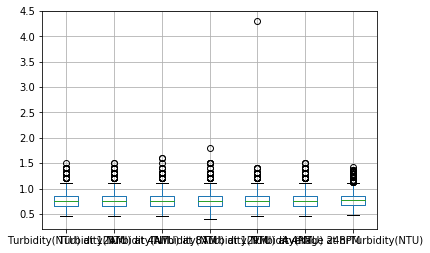

In [37]:
wqdata.boxplot()

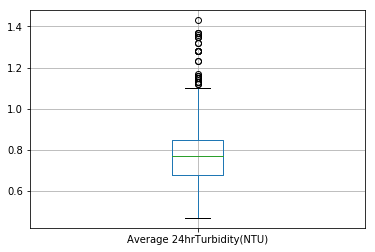

In [38]:
wqdata.boxplot(column='Average 24hrTurbidity(NTU)')

In [40]:
# Missing Data Problem 

# 1. Leave 2.dropna(), 3.fillna(), 4.fill with statistics

wqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 10 columns):
Site                          1884 non-null object
Date                          1884 non-null object
Turbidity(NTU) at 12AM        1872 non-null float64
Turbidity(NTU) at 4AM         1880 non-null float64
Turbidity(NTU) at 8AM         1883 non-null float64
Turbidity(NTU) at 12PM        1875 non-null float64
Turbidity(NTU) at 4PM         1876 non-null float64
Turbidity(NTU) at 8PM         1876 non-null float64
Average 24hrTurbidity(NTU)    1884 non-null float64
Coliform, Fecal(fc/100mL)     1878 non-null object
dtypes: float64(7), object(3)
memory usage: 147.3+ KB


In [41]:
wqdata['Turbidity(NTU) at 12AM'].value_counts(dropna=False) 
# We check value counts of each unique value in 'Turbidity(NTU) at 12AM' dataset 
# We DO count NaN / null values also since dropna=False

0.65    276
0.80    266
0.75    256
0.85    238
0.70    222
0.60    167
0.90    143
0.95     99
1.00     73
0.55     48
1.10     39
0.50     18
NaN      12
1.30      9
1.20      7
1.40      6
0.45      4
1.50      1
Name: Turbidity(NTU) at 12AM, dtype: int64

In [42]:
# Creating a new dataset by eliminating NaN values
wqdataComplete=wqdata.copy()
wqdataComplete['Turbidity(NTU) at 12AM'].dropna(inplace=True)
wqdataComplete['Turbidity(NTU) at 12AM'].value_counts(dropna=False) 

0.65    276
0.80    266
0.75    256
0.85    238
0.70    222
0.60    167
0.90    143
0.95     99
1.00     73
0.55     48
1.10     39
0.50     18
1.30      9
1.20      7
1.40      6
0.45      4
1.50      1
Name: Turbidity(NTU) at 12AM, dtype: int64

In [43]:
wqdataComplete['Turbidity(NTU) at 12AM'].fillna('empty', inplace=True)
wqdataComplete['Turbidity(NTU) at 12AM'].value_counts()

0.65    276
0.80    266
0.75    256
0.85    238
0.70    222
0.60    167
0.90    143
0.95     99
1.00     73
0.55     48
1.10     39
0.50     18
1.30      9
1.20      7
1.40      6
0.45      4
1.50      1
Name: Turbidity(NTU) at 12AM, dtype: int64

In [44]:
wqdataCompleteNan = wqdata.copy()
wqdataCompleteNan['Turbidity(NTU) at 12AM'].fillna('empty', inplace=True)
wqdataCompleteNan['Turbidity(NTU) at 12AM'].value_counts() 

# Now we copied a new dataframe and replace NaN values with 'empty'
# Value_counts() gives us the count of new 'empty' rows

0.65     276
0.8      266
0.75     256
0.85     238
0.7      222
0.6      167
0.9      143
0.95      99
1.0       73
0.55      48
1.1       39
0.5       18
empty     12
1.3        9
1.2        7
1.4        6
0.45       4
1.5        1
Name: Turbidity(NTU) at 12AM, dtype: int64

In [45]:
# Now we create to lists called "Months" and "Seasons"
Months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Seasons = ["Winter", "Spring", "Summer", "Autumn"]

MonthNum = []
for i in range(12):
    MonthNum.append(i)
zipMonths = dict(zip(MonthNum, Months))
zipMonths

{0: 'January',
 1: 'February',
 2: 'March',
 3: 'April',
 4: 'May',
 5: 'June',
 6: 'July',
 7: 'August',
 8: 'September',
 9: 'October',
 10: 'November',
 11: 'December'}

In [46]:
Seasons = ["Winter", "Spring", "Summer", "Autumn"]
Seasons

['Winter', 'Spring', 'Summer', 'Autumn']

In [47]:
Seasons = ["Winter", "Spring", "Summer", "Autumn"]
NewSeasons = []
i = 0 #Season[i]
while i < len(Seasons):
    j = 0 #InsertPos
    while j < 3:
        NewSeasons.insert(3*i+j, Seasons[i])
        j += 1
    i += 1
NewSeasons
NewSeasons.append(NewSeasons[0])
NewSeasons.pop(0)
NewSeasons

['Winter',
 'Winter',
 'Spring',
 'Spring',
 'Spring',
 'Summer',
 'Summer',
 'Summer',
 'Autumn',
 'Autumn',
 'Autumn',
 'Winter']

In [48]:
MonthsSeason = dict(zip(Months, NewSeasons))
MonthsSeason

{'January': 'Winter',
 'February': 'Winter',
 'March': 'Spring',
 'April': 'Spring',
 'May': 'Spring',
 'June': 'Summer',
 'July': 'Summer',
 'August': 'Summer',
 'September': 'Autumn',
 'October': 'Autumn',
 'November': 'Autumn',
 'December': 'Winter'}

In [49]:
# Now we create a new column called "Sampling Season" and assign a default value "Winter" to the whole column
wqdata['Sampling Season']="Winter"
wqdata['Sampling Month']=wqdata.Date[:3]
wqdata.head()

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)",Sampling Season,Sampling Month
0,DEL18DT,2019-10-31T00:00:00.000,0.65,0.6,0.65,0.65,0.65,0.65,0.64,E4,Winter,2019-10-31T00:00:00.000
1,DEL18DT,2019-10-30T00:00:00.000,0.65,0.7,0.75,0.60,0.65,0.60,0.66,E4,Winter,2019-10-30T00:00:00.000
2,DEL18DT,2019-10-29T00:00:00.000,0.65,0.7,0.65,0.65,0.60,0.70,0.66,E5,Winter,2019-10-29T00:00:00.000
3,DEL18DT,2019-10-28T00:00:00.000,0.65,0.7,0.70,0.65,0.65,0.60,0.66,E6,Winter,NaN
4,DEL18DT,2019-10-27T00:00:00.000,0.70,0.6,0.75,0.65,0.65,0.70,0.68,E2,Winter,NaN


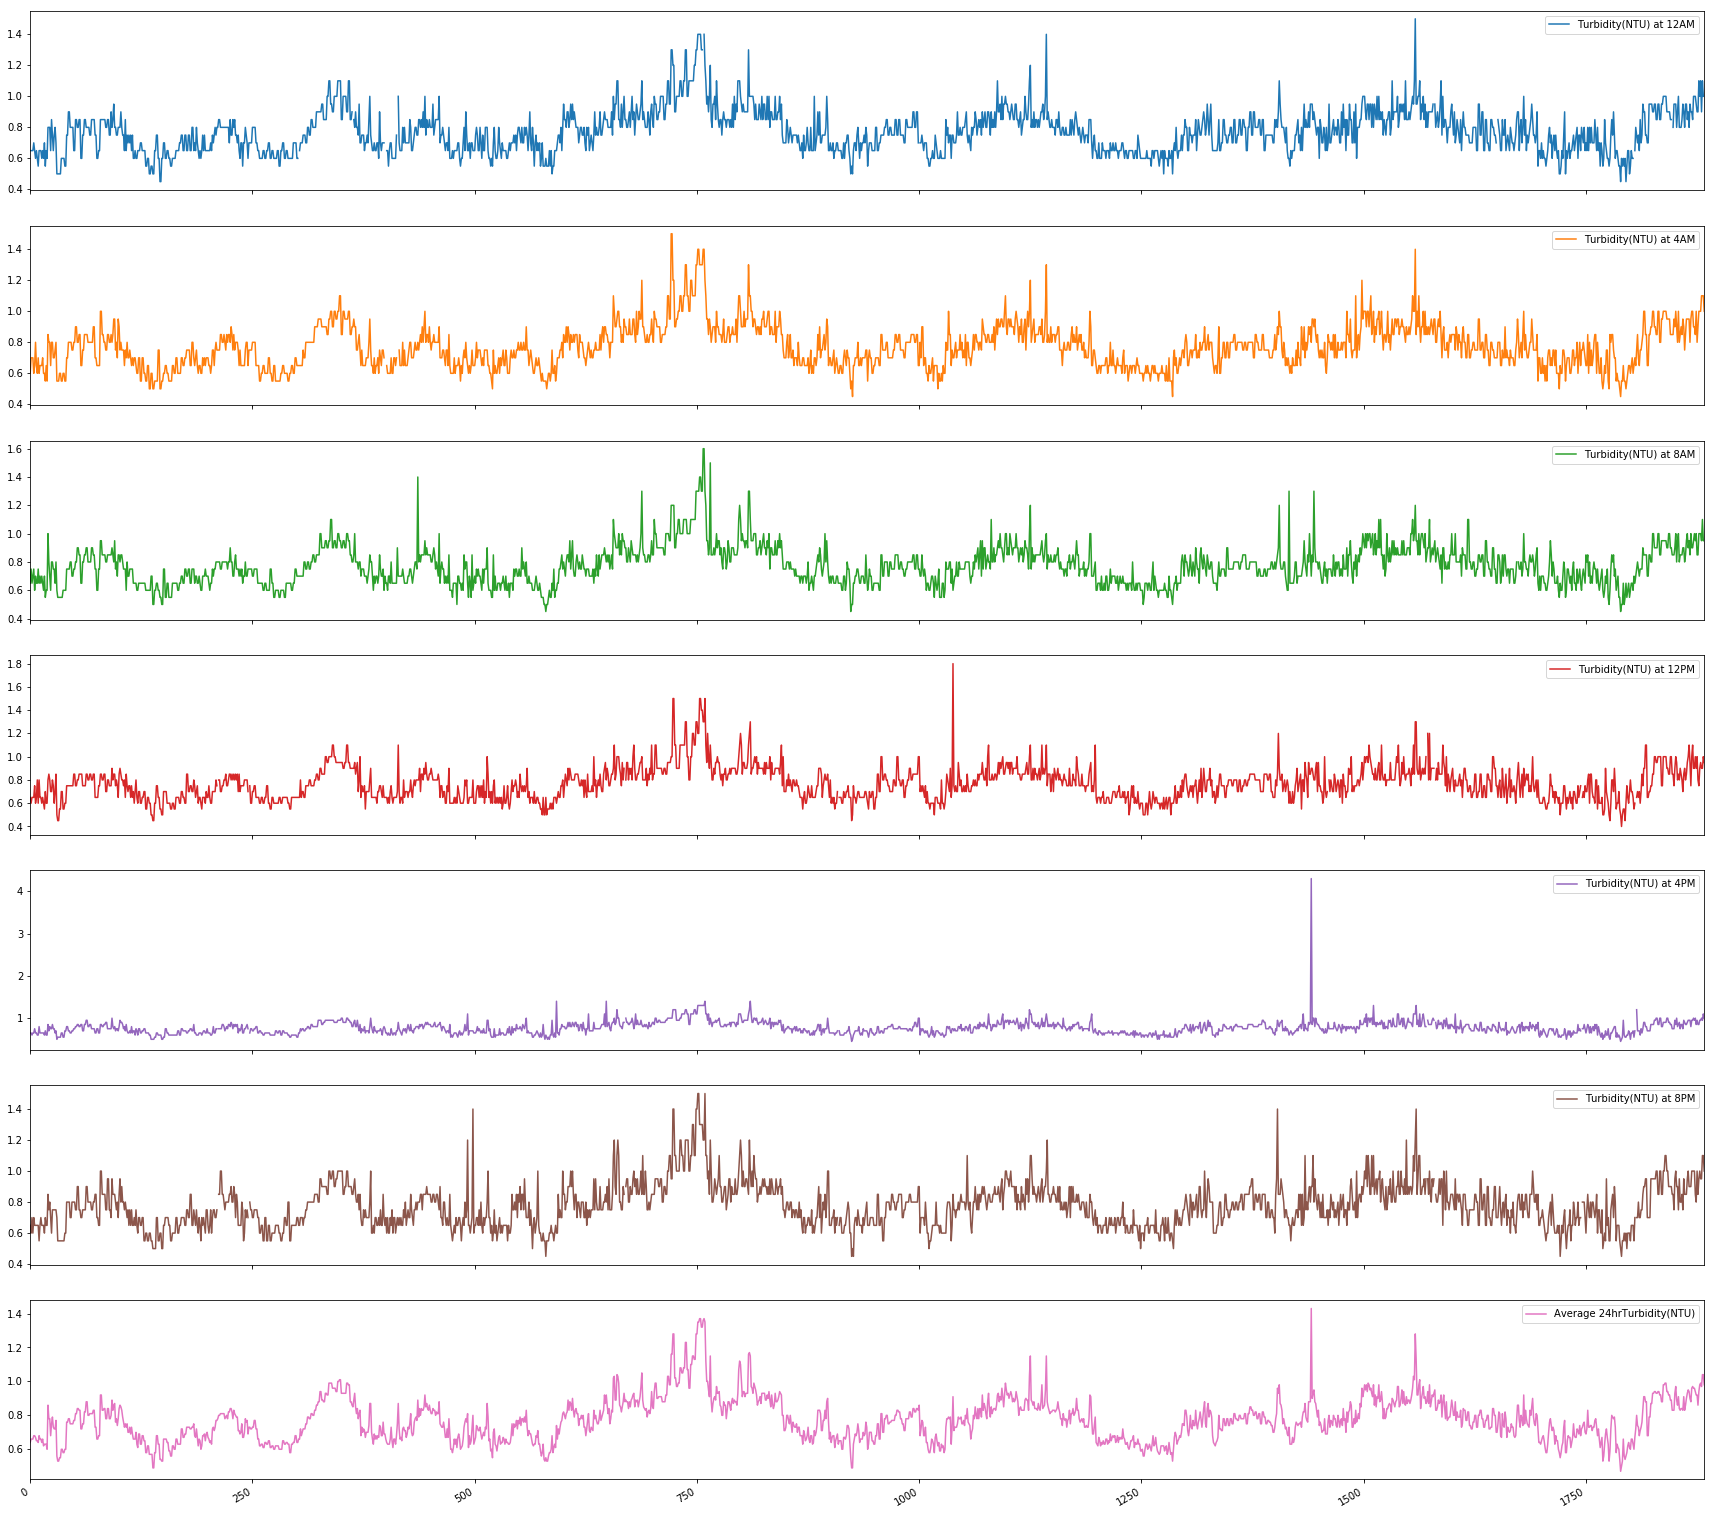

In [50]:
# Subplots 

wqdata.plot(subplots=True, figsize=(30,30))
plt.show()

In [51]:
wqdata.columns

Index(['Site', 'Date', 'Turbidity(NTU) at 12AM', 'Turbidity(NTU) at 4AM',
       'Turbidity(NTU) at 8AM', 'Turbidity(NTU) at 12PM',
       'Turbidity(NTU) at 4PM', 'Turbidity(NTU) at 8PM',
       'Average 24hrTurbidity(NTU)', 'Coliform, Fecal(fc/100mL)',
       'Sampling Season', 'Sampling Month'],
      dtype='object')

In [52]:
# Renaming column names

wqdata.rename(columns={'Site':'site', 'Date':'date', 'Turbidity(NTU) at 12AM':'turb12am', 'Turbidity(NTU) at 4AM':'turb4am',
                       'Turbidity(NTU) at 8AM':'turb8am', 'Turbidity(NTU) at 12PM':'turb12pm','Turbidity(NTU) at 4PM':'turb4pm', 
                       'Turbidity(NTU) at 8PM':'turb8pm', 'Average 24hrTurbidity(NTU)':'turbavg', 'Coliform, Fecal(fc/100mL)':'coliform',
                       'Sampling Season':'samplingseason', 'Sampling Month':'samplingmonth'}, inplace=True)
wqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 12 columns):
site              1884 non-null object
date              1884 non-null object
turb12am          1872 non-null float64
turb4am           1880 non-null float64
turb8am           1883 non-null float64
turb12pm          1875 non-null float64
turb4pm           1876 non-null float64
turb8pm           1876 non-null float64
turbavg           1884 non-null float64
coliform          1878 non-null object
samplingseason    1884 non-null object
samplingmonth     3 non-null object
dtypes: float64(7), object(5)
memory usage: 176.7+ KB


In [53]:
# Changing date column's data type to 'datetime'

wqdata.date = pd.to_datetime(wqdata.date)
wqdata = wqdata.set_index("date")
wqdata.head()

,site,turb12am,turb4am,turb8am,turb12pm,turb4pm,turb8pm,turbavg,coliform,samplingseason,samplingmonth
date,,,,,,,,,,,
2019-10-31,DEL18DT,0.65,0.6,0.65,0.65,0.65,0.65,0.64,E4,Winter,2019-10-31T00:00:00.000
2019-10-30,DEL18DT,0.65,0.7,0.75,0.60,0.65,0.60,0.66,E4,Winter,2019-10-30T00:00:00.000
2019-10-29,DEL18DT,0.65,0.7,0.65,0.65,0.60,0.70,0.66,E5,Winter,2019-10-29T00:00:00.000
2019-10-28,DEL18DT,0.65,0.7,0.70,0.65,0.65,0.60,0.66,E6,Winter,NaN
2019-10-27,DEL18DT,0.70,0.6,0.75,0.65,0.65,0.70,0.68,E2,Winter,NaN


In [54]:
print(wqdata.loc['2015-05-11':'2015-05-30'])

Empty DataFrame
Columns: [site, turb12am, turb4am, turb8am, turb12pm, turb4pm, turb8pm, turbavg, coliform, samplingseason, samplingmonth]
Index: []


In [55]:
wqdata.columns

Index(['site', 'turb12am', 'turb4am', 'turb8am', 'turb12pm', 'turb4pm',
       'turb8pm', 'turbavg', 'coliform', 'samplingseason', 'samplingmonth'],
      dtype='object')

In [56]:
wqdata.resample('M').mean().head(15) # Shows a monthly mean values (limited with the first 15 months) of each column in the dataframe 

,turb12am,turb4am,turb8am,turb12pm,turb4pm,turb8pm,turbavg
date,,,,,,,
2015-05-31,0.952381,0.956818,0.947727,0.925000,0.934091,0.950000,0.945000
2015-06-30,0.890217,0.898936,0.890426,0.884043,0.862766,0.900000,0.888298
2015-07-31,0.636207,0.636667,0.643333,0.631034,0.650000,0.631034,0.639333
2015-08-31,0.698387,0.693548,0.690323,0.667742,0.675806,0.706452,0.689677
2015-09-30,0.695000,0.698333,0.703333,0.675862,0.687931,0.694828,0.694333
2015-10-31,0.654839,0.659677,0.693548,0.651613,0.669355,0.674194,0.667742
2015-11-30,0.775000,0.768333,0.763793,0.771667,0.760000,0.768333,0.769667
2015-12-31,0.761224,0.758000,0.794000,0.758000,0.761000,0.766000,0.767000
2016-01-31,0.829032,0.825806,0.825806,0.822581,0.827419,0.832258,0.827097


In [57]:
wqdata.resample('A').max() # Shows a annual mean values of each column in the dataframe

,site,turb12am,turb4am,turb8am,turb12pm,turb4pm,turb8pm,turbavg,samplingseason
date,,,,,,,,,
2015-12-31,DEL18DT,1.1,1.1,1.1,1.1,1.2,1.1,1.04,Winter
2016-12-31,DEL18DT,1.5,1.4,1.3,1.3,4.3,1.4,1.43,Winter
2017-12-31,DEL18DT,1.4,1.3,1.2,1.8,1.2,1.2,1.15,Winter
2018-12-31,DEL18DT,1.4,1.5,1.6,1.5,1.4,1.5,1.37,Winter
2019-12-31,DEL18DT,1.1,1.1,1.1,1.1,1.0,1.0,1.01,Winter
